'''
Mark, votre manager, vous a convié à une réunion pour vous présenter le projet d’expansion à l’international de l’entreprise. 
Il vous confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale
permettent d’informer le projet d’expansion.

Voici les différentes questions que Mark aimerait explorer, que vous avez notées durant la réunion :

1) Quels sont les pays avec un fort potentiel de clients pour nos services ?
2) Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
3) Dans quels pays l'entreprise doit-elle opérer en priorité ?

Pour la pré-analyse, pourrais-tu :

Q1) Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)

Q2) Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)

Q3) Sélectionner les informations qui semblent pertinentes pour répondre à la problématique, 
(quelles sont les colonnes contenant des informations qui peuvent être utiles 
 pour répondre à la problématique de l’entreprise ?)

Q4) Déterminer des ordres de grandeurs des indicateurs statistiques classiques 
pour les différentes zones géographiqueset pays du monde 
(moyenne/médiane/écart-type par pays et par continent ou bloc géographique)'''


# 1.Preliminary
    
    
    

## 1.1 Import



In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## 1.2 Cleaning data

In [2]:
Ed_Stats_Country = pd.read_csv('Source/EdStatsCountry.csv',sep=';')
Ed_Stats_CountrySeries = pd.read_csv('Source/EdStatsCountry-Series.csv',sep=';')
Ed_Stats_Data = pd.read_csv('Source/EdStatsData2.csv',sep=';')
Ed_Stats_Foot_Note = pd.read_csv('Source/EdStatsFootNote.csv',sep=';')
EdSeries = pd.read_csv('Source/EdStatsSeries.csv',sep=';')

C:\Users\Dragomir\AppData\Local\Temp\ipykernel_18592\1413904616.py:3: DtypeWarning: Columns (4,5,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  Ed_Stats_Data = pd.read_csv('Source/EdStatsData2.csv',sep=';')


In [3]:
country = Ed_Stats_Country

country.head(2)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
country.isna().mean()

Country Code                                         0.000000
Short Name                                           0.000000
Table Name                                           0.000000
Long Name                                            0.000000
2-alpha code                                         0.012448
Currency Unit                                        0.107884
Special Notes                                        0.398340
Region                                               0.427386
Income Group                                         0.427386
WB-2 code                                            0.315353
National accounts base year                          0.464730
National accounts reference year                     0.892116
SNA price valuation                                  0.497925
Lending category                                     0.659751
Other groups                                         0.842324
System of National Accounts                          0.423237
Alternat

In [5]:
filtre_country = country.loc[:,['Short Name','Income Group','Region']]
print(country['Income Group'].unique())

[nan 'Upper middle income' 'High income: nonOECD' 'Lower middle income'
 'High income: OECD' 'Low income']


Class Income Group 
low-income economies are defined as those with a GNI per capita, calculated using the World Bank Atlas method, of $1,085 or less in 2021; 
lower middle-income economies are those with a GNI per capita between $1,086 and $4,255; 
upper middle-income economies are those with a GNI per capita between $4,256 and $13,205; 
high-income economies are those with a GNI per capita of $13,205 or more.

source : https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups

In [6]:
filtre_country.loc[filtre_country['Income Group'].isna(),'Income Group'] = 'non_renseigne'

income_group = filtre_country['Income Group'].unique()

print(income_group)

print('Nombre de pays',filtre_country['Income Group'].count())

['non_renseigne' 'Upper middle income' 'High income: nonOECD'
 'Lower middle income' 'High income: OECD' 'Low income']
Nombre de pays 241


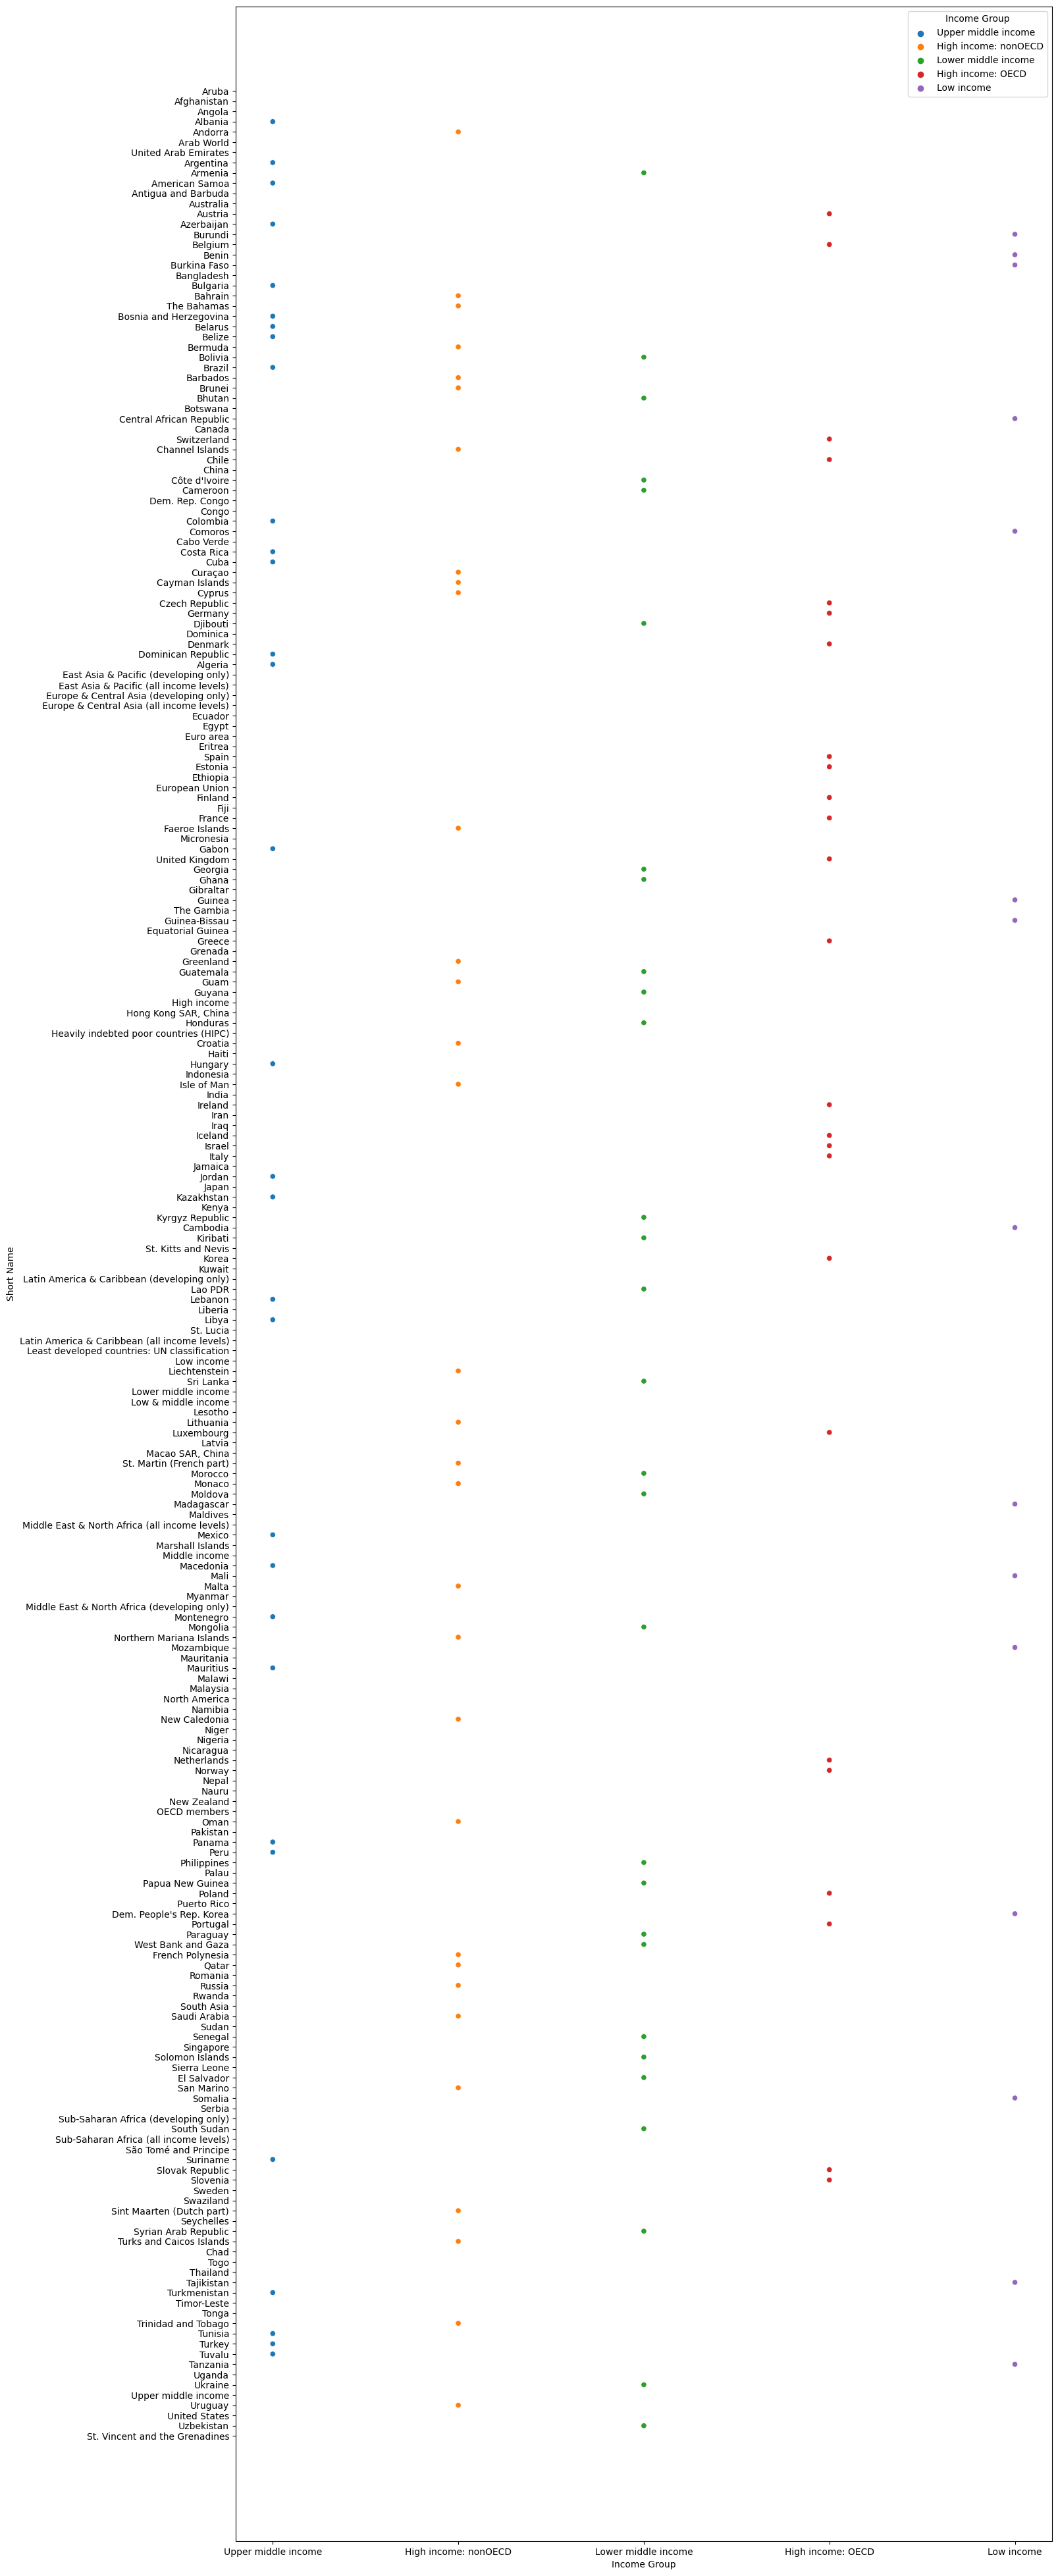

In [7]:
Coun = country.iloc[:230]
Coun.head(8)
f, ax = plt.subplots(figsize=(16, 50))
flr = sns.scatterplot(data = Coun, x = 'Income Group',y = 'Short Name', hue = 'Income Group',ax = ax)

<AxesSubplot:>

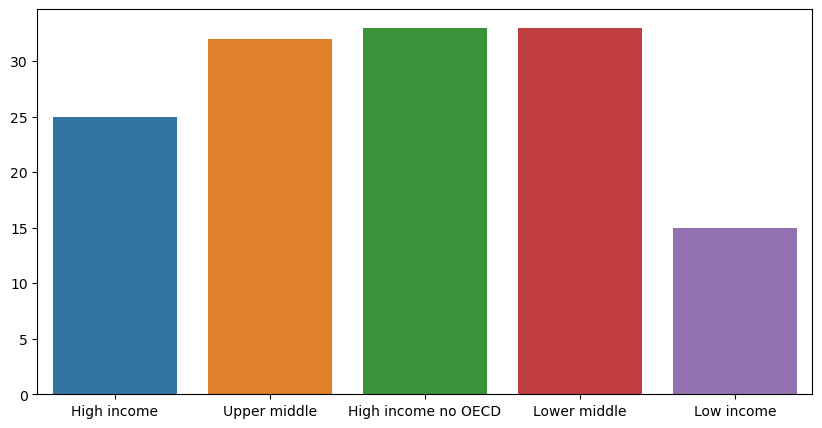

In [8]:
High_income = country.loc[ (country['Income Group'] == 'High income: OECD'),['Short Name','Income Group']].count()

Upper_middle_inc = country.loc[ (country['Income Group'] == 'Upper middle income'),['Short Name','Income Group']].count()

High_income_no_OECD = country.loc[ (country['Income Group'] == 'High income: nonOECD'),['Short Name','Income Group']].count()

Lower_middle_income = country.loc[ (country['Income Group'] == 'Lower middle income'),['Short Name','Income Group']].count()

Low_income = country.loc[ (country['Income Group'] == 'Low income'),['Short Name','Income Group']].count()

Country_sort_income_group = country.sort_values('Income Group')

Country_sort_income_group.head(200)

df = pd.DataFrame({'High income' : High_income, 'Upper middle' : Upper_middle_inc, 'High income no OECD' : High_income_no_OECD, 'Lower middle' : Lower_middle_income,'Low income' : Low_income})
df.head()
f, ax = plt.subplots(figsize=(10, 5))

sns.barplot(data = df ,ax = ax)

In [9]:
#Liste des Income Group par pays 

High_income = country.loc[ (country['Income Group'] == 'High income: OECD'),['Short Name','Income Group']]

Upper_middle_inc = country.loc[ (country['Income Group'] == 'Upper middle income'),['Short Name','Income Group']]

High_income_no_OECD = country.loc[ (country['Income Group'] == 'High income: nonOECD'),['Short Name','Income Group']]

Lower_middle_income = country.loc[ (country['Income Group'] == 'Lower middle income'),['Short Name','Income Group']]

Low_income = country.loc[ (country['Income Group'] == 'Low income'),['Short Name','Income Group']]



In [10]:
# Retire les données manquantes
Country_Income = Country_sort_income_group[['Short Name','Region','Income Group']].copy()
#Remplace les valeurs manquantes
Country_Income.loc[Country_Income['Income Group'].isna(),'Income Group']  = 'no value'

poor = Country_Income['Income Group'].isin(['Low income','no value'])
# Filtre les pays ayant une revenu national brut par habitant au-dessus de $1085.
Country_data = Country_Income.loc[ ~poor,:]

Country_Income_Group = Country_data['Short Name']

print('Les pays ayant un income group de -> High income à Upper middle income \n',Country_Income_Group)

Les pays ayant un income group de -> High income à Upper middle income 
 66            Estonia
69            Finland
51            Germany
50     Czech Republic
71             France
            ...      
149        Montenegro
46               Cuba
45         Costa Rica
42           Colombia
3             Albania
Name: Short Name, Length: 123, dtype: object


In [11]:
country_series = Ed_Stats_CountrySeries
country_series.head(5)

,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...


In [12]:
country_series.isna().mean()

CountryCode    0.0
SeriesCode     0.0
DESCRIPTION    0.0
dtype: float64

In [13]:
ed_data = Ed_Stats_Data
uni = ed_data['Indicator Name'].unique()
ed_data.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,2011,2012,2013,2014,2015,2016,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

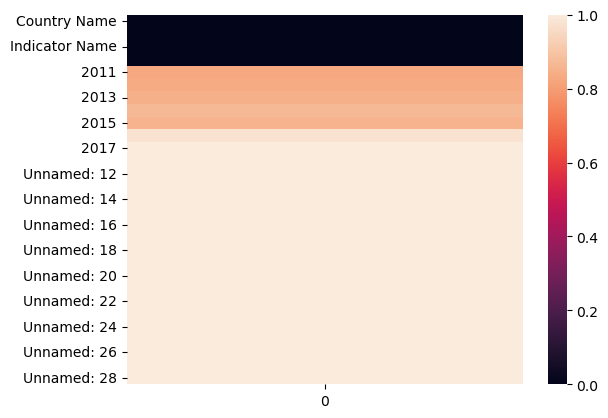

In [14]:
sns.heatmap(pd.DataFrame(ed_data.isna().mean()))

#Indicateur 

Enrolment in secondary education, both sexes (number)
Enrolment in upper secondary education, both sexes (number)
Enrolment in tertiary education, all programmes, both sexes (number)
Gross enrolment ratio, secondary, both sexes (%)
GDP at market prices (constant 2005 US$)
GDP at market prices (current US$)
GDP per capita (constant 2005 US$)
GDP per capita (current US$)  Ok
GDP per capita, PPP (constant 2011 international $)
GDP per capita, PPP (current international $)
GDP, PPP (constant 2011 international $)
GNI per capita, PPP (current international $) Ok
GNI (current US$) Ok
Internet users (per 100 people) Ok
Illiterate population, 25-64 years, both sexes (number) Ok
Lower secondary completion rate, both sexes (%) 
Out-of-school children of primary school age, both sexes (number)
Personal computers (per 100 people) Pas besoin 
Percentage of graduates from tertiary education graduating from Engineering, Manufacturing and Construction programmes, both sexes (%)
Percentage of graduates from tertiary education graduating from Education programmes, both sexes (%)
Percentage of repeaters in primary education, all grades, gender parity index (GPI)
Percentage of students in tertiary education enrolled in Agriculture programmes, both sexes (%)
Percentage of students in tertiary education enrolled in Education programmes, both sexes (%)
Percentage of students in tertiary education enrolled in Engineering, Manufacturing and Construction programmes, both sexes (%)
Percentage of students in tertiary education enrolled in Health and Welfare programmes, both sexes (%)
Percentage of students in tertiary education enrolled in Humanities and Arts programmes, both sexes (%)
Percentage of students in tertiary education enrolled in programmes in unspecified fields, both sexes (%)
Percentage of students in tertiary education enrolled in Science programmes, both sexes (%)
Percentage of students in tertiary education enrolled in Services programmes, both sexes (%)
Percentage of students in tertiary education enrolled in Social Sciences, Business and Law programmes, both sexes (%)
Population growth (annual %) Ok
Population, ages 15-64 (% of total)
Population, ages 15-64, female
Population, ages 15-64, male
Population, ages 15-64, total OK
Population of the official age for tertiary education, both sexes (number) Ok
Net enrolment rate, upper secondary, both sexes (%)
Net enrolment rate, secondary, both sexes (%)
Pupil-teacher ratio in primary education (headcount basis) Etudier 
Rate of out-of-school children of primary school age, both sexes (%)
School life expectancy, primary and secondary, both sexes (years)
School life expectancy, primary to tertiary, both sexes (years) 
School life expectancy, tertiary, both sexes (years) 
Unemployment, total (% of total labor force) L'analyser 
Youth illiterate population, 15-24 years, both sexes (number) Ok
Country Name	Country Code	Indicator Name	Indicator Code

In [15]:
filt_ed_data_indicator = ['Country Name','Indicator Name','2013','2014','2015','2016','2017']

filt_Total_Population = 'Population, ages 15-64, total'

popul_sup_1M = ed_data.loc[ed_data['Indicator Name'] == filt_Total_Population,filt_ed_data_indicator]

# Affecte à la valeur NaN la valeur 0
popul_sup_1M['2016'] = popul_sup_1M['2016'].fillna(0)

# Covertie le type des données en int
popul_sup_1M['2016'] = popul_sup_1M['2016'].astype('int64')

popul_sup_1M = popul_sup_1M.loc[popul_sup_1M['2016'] > 1000000, :]

filter_country = popul_sup_1M['Country Name'].values

# Tri des pays dont l'income group n'appartient pas à la catégorie low income et dont la population est > à 1 M d'hab
i = [i for i in Country_Income_Group for j in filter_country if i == j]

print(f'il y a {len(filter_country)} pays dont la population est superieur à 1 M') 

i = np.array(i)

ed_data['Country Name']= ed_data['Country Name'].astype(str)

# Filtre les pays avec les Income_Group suivant ['Upper middle income' 'High income: nonOECD' 'Lower middle income''High income: OECD'] et la population sup à 1 M d'habitant  
mask = ed_data['Country Name'].isin(i)

ed_data = ed_data.loc[mask]

il y a 160 pays dont la population est superieur à 1 M


In [116]:
Indicator1 = ['GDP per capita (current US$)','GNI per capita, PPP (current international $)','Internet users (per 100 people)','Population growth (annual %)','Population, ages 15-64, total','Net enrolment rate, upper secondary, both sexes (%)','Net enrolment rate, secondary, both sexes (%)','Illiterate population, 25-64 years, both sexes (number)','Enrolment in secondary education, both sexes (number)','Enrolment in upper secondary education, both sexes (number)','Population of the official entrance age to secondary general education, both sexes (number)','Unemployment, total (% of total labor force)']
Indicator2 = ['Percentage of graduates from tertiary education graduating from Education programmes, both sexes (%)','Percentage of repeaters in primary education, all grades, gender parity index (GPI)','Percentage of students in tertiary education enrolled in Agriculture programmes, both sexes (%)','Percentage of students in tertiary education enrolled in Education programmes, both sexes (%)','Percentage of students in tertiary education enrolled in Engineering, Manufacturing and Construction programmes, both sexes (%)','ercentage of students in tertiary education enrolled in Health and Welfare programmes, both sexes (%)','Percentage of students in tertiary education enrolled in Humanities and Arts programmes, both sexes (%)','ercentage of students in tertiary education enrolled in programmes in unspecified fields, both sexes (%)','Percentage of students in tertiary education enrolled in Science programmes, both sexes (%)','Percentage of students in tertiary education enrolled in Services programmes, both sexes (%)','Percentage of students in tertiary education enrolled in Social Sciences, Business and Law programmes, both sexes (%)']
indic1 = ed_data['Indicator Name'].isin(Indicator1)
Ed_data = ed_data.loc[indic1,filt_ed_data_indicator]
print(Ed_data.isna().mean())
Ed_data = Ed_data.drop(columns='2017')
Ed_data

Country Name      0.000000
Indicator Name    0.000000
2013              0.157778
2014              0.183333
2015              0.305556
2016              0.421111
2017              1.000000
dtype: float64


,Country Name,Indicator Name,2013,2014,2015,2016
96481,Albania,"Enrolment in secondary education, both sexes (...",346365,333291,315079,NaN
96504,Albania,"Enrolment in upper secondary education, both s...",154425,151937,NaN,NaN
96535,Albania,GDP per capita (current US$),4413.08169670601,4578.66672753259,3934.89539413158,4124.98239042866
96542,Albania,"GNI per capita, PPP (current international $)",10610,11200,11340,11670
96659,Albania,"Illiterate population, 25-64 years, both sexes...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
881258,Zambia,"Net enrolment rate, upper secondary, both sexe...",NaN,NaN,NaN,NaN
881907,Zambia,Population growth (annual %),3.036918,3.040211,3.024123,3.002816
881938,Zambia,Population of the official entrance age to sec...,365592.0,378356.0,391447.0,404706.0
882086,Zambia,"Population, ages 15-64, total",7798003.0,8088061.0,8391596.0,8696624.0


In [18]:
colnames = ['2013','2014','2015','2016']
X = Ed_data.loc[:,colnames]
X.head()

,2013,2014,2015,2016
96481,346365,333291,315079,NaN
96504,154425,151937,NaN,NaN
96535,4413.08169670601,4578.66672753259,3934.89539413158,4124.98239042866
96542,10610,11200,11340,11670
96659,NaN,NaN,NaN,NaN


In [26]:
X = X.astype(float)

In [93]:
moyenne = X.mean(axis = 1)
moyenne.values
moyenne.count()

779

In [30]:
Ed_data['valeur'] = moyenne.values
Ed_data.head()

,Country Name,Indicator Name,2013,2014,2015,2016,valeur
96481,Albania,"Enrolment in secondary education, both sexes (...",346365,333291,315079,NaN,331578.333333
96504,Albania,"Enrolment in upper secondary education, both s...",154425,151937,NaN,NaN,153181.000000
96535,Albania,GDP per capita (current US$),4413.08169670601,4578.66672753259,3934.89539413158,4124.98239042866,4262.906552
96542,Albania,"GNI per capita, PPP (current international $)",10610,11200,11340,11670,11205.000000
96659,Albania,"Illiterate population, 25-64 years, both sexes...",NaN,NaN,NaN,NaN,NaN


In [87]:
enrol_mean = Ed_data.loc[Ed_data['Indicator Name'] == 'Enrolment in secondary education, both sexes (number)',['Country Name','Indicator Name','2013']]
enrol_mean['2013'] =enrol_mean['2013'].astype(float).mean()
enrol_mean.loc[enrol_mean['Indicator Name'] == 'Enrolment in secondary education, both sexes (number)','2013'].mean()

2289570.8908730154

In [57]:
pivot_data = Ed_data.pivot_table(index = 'Country Name',columns = 'Indicator Name', values = 'valeur')
pivot_data


Indicator Name,"Enrolment in secondary education, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",GDP per capita (current US$),"GNI per capita, PPP (current international $)","Illiterate population, 25-64 years, both sexes (number)",Internet users (per 100 people),"Net enrolment rate, secondary, both sexes (%)","Net enrolment rate, upper secondary, both sexes (%)",Population growth (annual %),"Population of the official entrance age to secondary general education, both sexes (number)","Population, ages 15-64, total","Unemployment, total (% of total labor force)"
Country Name,,,,,,,,,,,,
Albania,3.315783e+05,1.531810e+05,4262.906552,11205.0,NaN,61.729094,85.072149,68.868717,-0.210336,40484.00,1995335.00,16.350
Algeria,NaN,NaN,4753.662701,13975.0,NaN,33.286382,NaN,NaN,1.945545,571477.25,25937015.25,10.775
Argentina,4.428394e+06,1.722700e+06,12782.329053,19662.5,340191.37340,65.698457,88.203159,61.864441,1.018646,714692.75,27584716.50,7.600
Armenia,2.457540e+05,1.051655e+05,3767.731918,8857.5,NaN,54.406296,NaN,NaN,0.369354,NaN,2017658.75,17.425
Austria,6.983204e+05,3.665146e+05,47846.199846,49365.0,NaN,82.469525,NaN,NaN,0.923900,81638.00,5769274.25,5.650
...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,6.526982e+06,4.156137e+06,43538.624995,40562.5,NaN,92.057550,96.307858,90.010033,0.748848,687491.25,41820933.75,5.925
Uruguay,3.130630e+05,1.226660e+05,16091.128109,20292.5,20336.31856,62.537500,75.769886,45.392761,0.345207,50074.75,2195665.50,7.050
Uzbekistan,4.037855e+06,NaN,2051.556093,6080.0,0.00000,37.972822,92.695610,NaN,1.683214,495997.25,20989877.75,8.875


In [58]:
pivot_data.isna().mean(axis = 1).sort_values(ascending = False).head(10)

Country Name
Libya               0.583333
Zambia              0.416667
Algeria             0.416667
Papua New Guinea    0.416667
Gabon               0.416667
Armenia             0.333333
Ireland             0.333333
Morocco             0.333333
Paraguay            0.333333
Slovak Republic     0.250000
dtype: float64

In [96]:
pivot_data = pivot_data.reset_index()
pivot_data

Indicator Name,level_0,index,Country Name,"Enrolment in secondary education, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",GDP per capita (current US$),"GNI per capita, PPP (current international $)",Internet users (per 100 people),"Net enrolment rate, secondary, both sexes (%)","Net enrolment rate, upper secondary, both sexes (%)",Population growth (annual %),"Population of the official entrance age to secondary general education, both sexes (number)","Population, ages 15-64, total","Unemployment, total (% of total labor force)"
0,0,0,Albania,3.315783e+05,1.531810e+05,4262.906552,11205.0,61.729094,85.072149,68.868717,-0.210336,40484.00,1995335.00,16.350
1,1,2,Argentina,4.428394e+06,1.722700e+06,12782.329053,19662.5,65.698457,88.203159,61.864441,1.018646,714692.75,27584716.50,7.600
2,2,3,Armenia,2.457540e+05,1.051655e+05,3767.731918,8857.5,54.406296,NaN,NaN,0.369354,NaN,2017658.75,17.425
3,3,4,Austria,6.983204e+05,3.665146e+05,47846.199846,49365.0,82.469525,NaN,NaN,0.923900,81638.00,5769274.25,5.650
4,4,5,Azerbaijan,NaN,3.712230e+05,6286.075886,16677.5,75.800004,NaN,78.636105,1.224110,129713.00,6844574.75,4.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,65,69,Ukraine,2.629103e+06,8.402335e+05,2861.191124,8275.0,47.139139,87.600124,59.983410,-0.324877,370659.75,31292116.00,8.700
66,66,70,United Kingdom,6.526982e+06,4.156137e+06,43538.624995,40562.5,92.057550,96.307858,90.010033,0.748848,687491.25,41820933.75,5.925
67,67,71,Uruguay,3.130630e+05,1.226660e+05,16091.128109,20292.5,62.537500,75.769886,45.392761,0.345207,50074.75,2195665.50,7.050
68,68,72,Uzbekistan,4.037855e+06,NaN,2051.556093,6080.0,37.972822,92.695610,NaN,1.683214,495997.25,20989877.75,8.875


In [60]:
pivot_data.isna().mean().sort_values(ascending = False)

Indicator Name
Illiterate population, 25-64 years, both sexes (number)                                        0.653333
Net enrolment rate, secondary, both sexes (%)                                                  0.306667
Net enrolment rate, upper secondary, both sexes (%)                                            0.293333
Enrolment in upper secondary education, both sexes (number)                                    0.133333
Enrolment in secondary education, both sexes (number)                                          0.106667
GNI per capita, PPP (current international $)                                                  0.053333
Population of the official entrance age to secondary general education, both sexes (number)    0.040000
GDP per capita (current US$)                                                                   0.026667
Country Name                                                                                   0.000000
Internet users (per 100 people)                  

In [62]:
pivot_data.head()

Indicator Name,Country Name,"Enrolment in secondary education, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",GDP per capita (current US$),"GNI per capita, PPP (current international $)","Illiterate population, 25-64 years, both sexes (number)",Internet users (per 100 people),"Net enrolment rate, secondary, both sexes (%)","Net enrolment rate, upper secondary, both sexes (%)",Population growth (annual %),"Population of the official entrance age to secondary general education, both sexes (number)","Population, ages 15-64, total","Unemployment, total (% of total labor force)"
0,Albania,3.315783e+05,1.531810e+05,4262.906552,11205.0,NaN,61.729094,85.072149,68.868717,-0.210336,40484.00,1995335.00,16.350
1,Algeria,NaN,NaN,4753.662701,13975.0,NaN,33.286382,NaN,NaN,1.945545,571477.25,25937015.25,10.775
2,Argentina,4.428394e+06,1.722700e+06,12782.329053,19662.5,340191.3734,65.698457,88.203159,61.864441,1.018646,714692.75,27584716.50,7.600
3,Armenia,2.457540e+05,1.051655e+05,3767.731918,8857.5,NaN,54.406296,NaN,NaN,0.369354,NaN,2017658.75,17.425
4,Austria,6.983204e+05,3.665146e+05,47846.199846,49365.0,NaN,82.469525,NaN,NaN,0.923900,81638.00,5769274.25,5.650


Indicator Name
Country Name                                                                                   0.000000
Enrolment in secondary education, both sexes (number)                                          0.106667
Enrolment in upper secondary education, both sexes (number)                                    0.133333
GDP per capita (current US$)                                                                   0.026667
GNI per capita, PPP (current international $)                                                  0.053333
Illiterate population, 25-64 years, both sexes (number)                                        0.653333
Internet users (per 100 people)                                                                0.000000
Net enrolment rate, secondary, both sexes (%)                                                  0.306667
Net enrolment rate, upper secondary, both sexes (%)                                            0.293333
Population growth (annual %)                     

<AxesSubplot:ylabel='Indicator Name'>

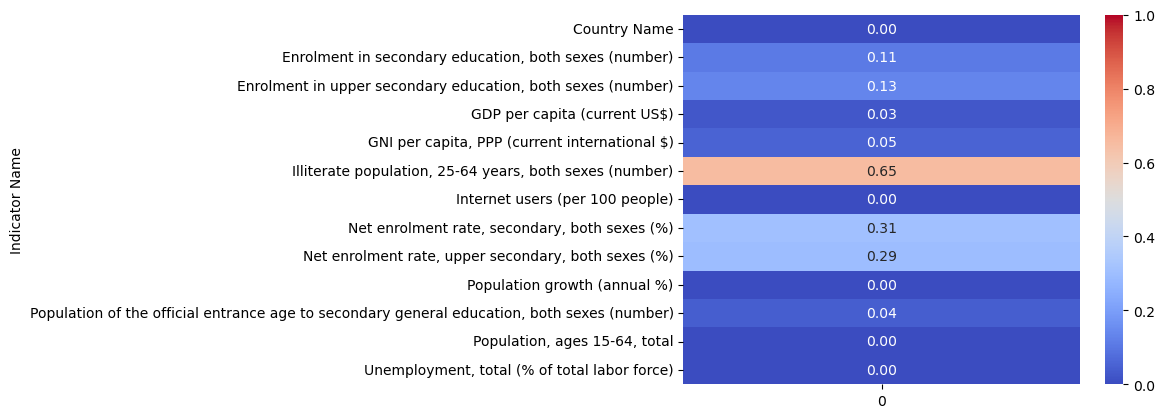

In [63]:
MAP = pivot_data.isna().mean()
print(MAP)
MAP = pd.DataFrame(data= MAP)
sns.heatmap(MAP,cmap = "coolwarm",vmin=0,vmax=1,annot = True,fmt=".2f" )

In [64]:
pivot_data = pivot_data.drop(columns = 'Illiterate population, 25-64 years, both sexes (number)')
pivot_data.head()

Indicator Name,Country Name,"Enrolment in secondary education, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",GDP per capita (current US$),"GNI per capita, PPP (current international $)",Internet users (per 100 people),"Net enrolment rate, secondary, both sexes (%)","Net enrolment rate, upper secondary, both sexes (%)",Population growth (annual %),"Population of the official entrance age to secondary general education, both sexes (number)","Population, ages 15-64, total","Unemployment, total (% of total labor force)"
0,Albania,3.315783e+05,1.531810e+05,4262.906552,11205.0,61.729094,85.072149,68.868717,-0.210336,40484.00,1995335.00,16.350
1,Algeria,NaN,NaN,4753.662701,13975.0,33.286382,NaN,NaN,1.945545,571477.25,25937015.25,10.775
2,Argentina,4.428394e+06,1.722700e+06,12782.329053,19662.5,65.698457,88.203159,61.864441,1.018646,714692.75,27584716.50,7.600
3,Armenia,2.457540e+05,1.051655e+05,3767.731918,8857.5,54.406296,NaN,NaN,0.369354,NaN,2017658.75,17.425
4,Austria,6.983204e+05,3.665146e+05,47846.199846,49365.0,82.469525,NaN,NaN,0.923900,81638.00,5769274.25,5.650


In [66]:
c_list = ['Libya','Zambia','Algeria','Papua New Guinea','Gabon']
pivot_data = pivot_data.loc[~pivot_data['Country Name'].isin(c_list)]

Indicator Name
Country Name                                                                                   0.000000
Enrolment in secondary education, both sexes (number)                                          0.042857
Enrolment in upper secondary education, both sexes (number)                                    0.071429
GDP per capita (current US$)                                                                   0.014286
GNI per capita, PPP (current international $)                                                  0.042857
Internet users (per 100 people)                                                                0.000000
Net enrolment rate, secondary, both sexes (%)                                                  0.257143
Net enrolment rate, upper secondary, both sexes (%)                                            0.242857
Population growth (annual %)                                                                   0.000000
Population of the official entrance age to second

<AxesSubplot:ylabel='Indicator Name'>

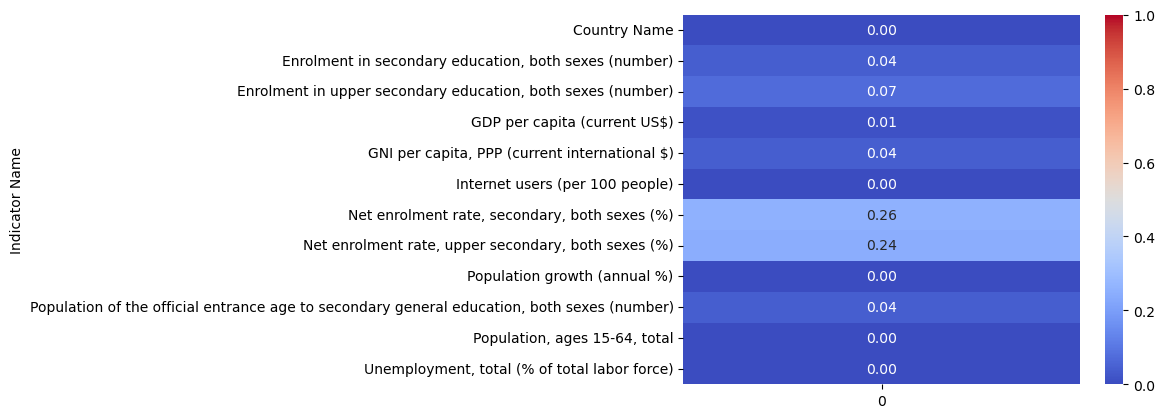

In [68]:
MAP = pivot_data.isna().mean()
print(MAP)
MAP = pd.DataFrame(data= MAP)
sns.heatmap(MAP,cmap = "coolwarm",vmin=0,vmax=1,annot = True,fmt=".2f" )


In [70]:
pivot_data.head()

Indicator Name,Country Name,"Enrolment in secondary education, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",GDP per capita (current US$),"GNI per capita, PPP (current international $)",Internet users (per 100 people),"Net enrolment rate, secondary, both sexes (%)","Net enrolment rate, upper secondary, both sexes (%)",Population growth (annual %),"Population of the official entrance age to secondary general education, both sexes (number)","Population, ages 15-64, total","Unemployment, total (% of total labor force)"
0,Albania,3.315783e+05,1.531810e+05,4262.906552,11205.0,61.729094,85.072149,68.868717,-0.210336,40484.00,1995335.00,16.350
2,Argentina,4.428394e+06,1.722700e+06,12782.329053,19662.5,65.698457,88.203159,61.864441,1.018646,714692.75,27584716.50,7.600
3,Armenia,2.457540e+05,1.051655e+05,3767.731918,8857.5,54.406296,NaN,NaN,0.369354,NaN,2017658.75,17.425
4,Austria,6.983204e+05,3.665146e+05,47846.199846,49365.0,82.469525,NaN,NaN,0.923900,81638.00,5769274.25,5.650
5,Azerbaijan,NaN,3.712230e+05,6286.075886,16677.5,75.800004,NaN,78.636105,1.224110,129713.00,6844574.75,4.975


In [71]:
pivot_data.to_csv('data_clean.csv',index = False)

In [ ]:
1/0
# fin du notebook

In [147]:
Indicator2 = ['Percentage of graduates from tertiary education graduating from Education programmes, both sexes (%)','Percentage of repeaters in primary education, all grades, gender parity index (GPI)','Percentage of students in tertiary education enrolled in Agriculture programmes, both sexes (%)','Percentage of students in tertiary education enrolled in Education programmes, both sexes (%)','Percentage of students in tertiary education enrolled in Engineering, Manufacturing and Construction programmes, both sexes (%)','Percentage of students in tertiary education enrolled in Health and Welfare programmes, both sexes (%)','Percentage of students in tertiary education enrolled in Humanities and Arts programmes, both sexes (%)','Percentage of students in tertiary education enrolled in programmes in unspecified fields, both sexes (%)','Percentage of students in tertiary education enrolled in Science programmes, both sexes (%)','Percentage of students in tertiary education enrolled in Services programmes, both sexes (%)','Percentage of students in tertiary education enrolled in Social Sciences, Business and Law programmes, both sexes (%)']
#Récupére uniquement les indicateurs dans 'Indicator2'
data_ind2 = ed_data['Indicator Name'].isin(Indicator2)

Ed_data = ed_data.loc[data_ind2,filt_ed_data_indicator]



Ed_data = Ed_data.drop(columns=['2016','2015','2017'])

print(Ed_data.isna().mean())
mask = Ed_data['2013'].duplicated(keep = False)
print('Ed_data duplicated : ',Ed_data.loc[mask,'Indicator Name'].count())


Ed_data2013 = Ed_data.pivot_table(index = 'Country Name',columns = 'Indicator Name', values = '2013').reset_index()
Ed_data2013 = Ed_data2013.fillna(0)
Ed_data2014 = Ed_data.pivot_table(index = 'Country Name',columns = 'Indicator Name', values = '2014').reset_index()
Ed_data2014 = Ed_data2014.fillna(0)


Ed_data = pd.concat([Ed_data2013,Ed_data2014])

#Ed_data = Ed_data.reset_index

Ed_data

Country Name      0.000000
Indicator Name    0.000000
2013              0.383030
2014              0.424242
dtype: float64
Ed_data duplicated :  316


Indicator Name,Country Name,"Percentage of graduates from tertiary education graduating from Education programmes, both sexes (%)","Percentage of repeaters in primary education, all grades, gender parity index (GPI)","Percentage of students in tertiary education enrolled in Agriculture programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Education programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Engineering, Manufacturing and Construction programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Health and Welfare programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Humanities and Arts programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Science programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Services programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Social Sciences, Business and Law programmes, both sexes (%)","Percentage of students in tertiary education enrolled in programmes in unspecified fields, both sexes (%)"
0,Albania,12.949120,0.72164,5.77186,7.714890,10.401150,14.29529,12.263260,9.01467,1.34139,39.197479,0.00000
1,Algeria,2.146930,0.58970,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000
2,Argentina,16.407221,0.67362,3.14680,13.722800,8.429450,13.59308,12.896560,9.84231,2.59037,35.404781,0.37385
3,Austria,10.903700,0.78436,1.49268,12.808700,16.555679,7.14431,11.608280,10.81531,5.08639,34.290920,0.19772
4,Azerbaijan,14.971160,1.06732,1.20156,26.985979,19.875790,8.72435,9.003150,4.63724,0.24308,26.961460,2.36740
...,...,...,...,...,...,...,...,...,...,...,...,...
52,Tunisia,0.289290,0.60343,1.79053,0.234180,19.103559,8.65787,17.107189,23.68099,2.92494,26.500740,0.00000
53,Turkey,10.400180,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000
54,Ukraine,5.090750,0.99947,3.48966,5.336420,22.354090,8.18158,8.760740,5.36973,9.22290,32.286949,4.99793
55,United Kingdom,9.718630,0.00000,1.04318,7.433900,9.203630,17.00029,16.122950,18.67514,1.54500,26.593149,2.38275


In [162]:
Ed_data = Ed_data.groupby('Country Name')[Indicator2].mean()
#Ed_data = pd.DataFrame(Ed_data)
Ed_data.head(10)

Indicator Name,"Percentage of graduates from tertiary education graduating from Education programmes, both sexes (%)","Percentage of repeaters in primary education, all grades, gender parity index (GPI)","Percentage of students in tertiary education enrolled in Agriculture programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Education programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Engineering, Manufacturing and Construction programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Health and Welfare programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Humanities and Arts programmes, both sexes (%)","Percentage of students in tertiary education enrolled in programmes in unspecified fields, both sexes (%)","Percentage of students in tertiary education enrolled in Science programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Services programmes, both sexes (%)","Percentage of students in tertiary education enrolled in Social Sciences, Business and Law programmes, both sexes (%)"
Country Name,,,,,,,,,,,
Albania,11.066730,0.719200,5.486050,8.294820,10.490850,14.530900,12.115155,0.000000,8.860425,1.604135,38.617661
Algeria,1.908105,0.587360,0.773440,1.080065,8.327365,2.740195,10.502755,0.912020,7.982960,0.230475,17.450729
Argentina,16.407221,0.673620,3.146800,13.722800,8.429450,13.593080,12.896560,0.373850,9.842310,2.590370,35.404781
Armenia,9.927070,1.082640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Austria,11.181770,0.788780,1.496960,13.240380,16.701900,7.141050,11.263935,0.196700,10.785810,5.091695,34.081560
Azerbaijan,19.619450,1.109470,1.227440,27.187904,20.353400,8.468600,8.347000,2.302935,4.596500,0.265860,27.250365
Bahrain,2.003295,0.997845,0.017055,2.346970,6.319365,4.262325,5.292160,0.129875,3.073755,2.096400,26.462099
Belarus,9.047660,0.975630,8.272480,8.937415,28.202405,6.870245,5.291765,0.000000,3.112270,4.581895,34.731525
Belgium,4.732860,0.940925,2.337820,12.623475,10.199290,24.154490,9.429730,1.862730,6.091005,1.809685,31.491780


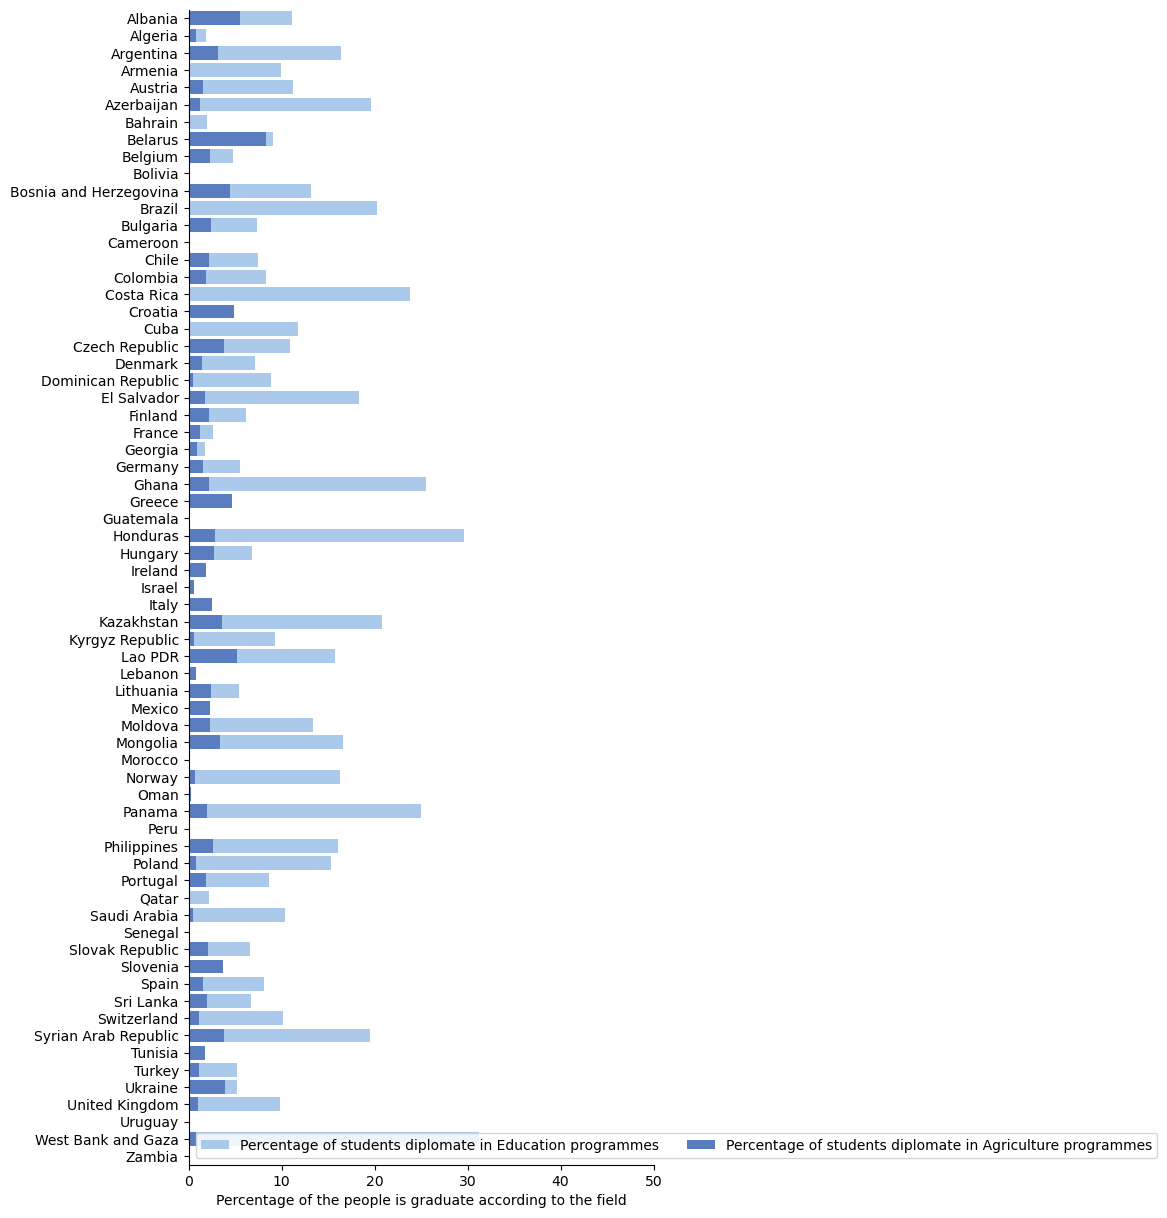

In [165]:
f, ax = plt.subplots(figsize=(6, 15))

pays = Ed_data.index
# Plot 
sns.set_color_codes("pastel")
sns.barplot(x="Percentage of graduates from tertiary education graduating from Education programmes, both sexes (%)", 
            y= pays, data=Ed_data,
            label="Percentage of students diplomate in Education programmes", color="b")

# Plot 
sns.set_color_codes("muted")
sns.barplot(x="Percentage of students in tertiary education enrolled in Agriculture programmes, both sexes (%)", 
            y=pays, data=Ed_data,
            label="Percentage of students diplomate in Agriculture programmes", color="b")
# Add a legend and informative axis label
ax.legend(ncol=2, loc=0, frameon=True)
ax.set(xlim=(0, 50), ylabel="",xlabel="Percentage of the people is graduate according to the field")
sns.despine(right=True, top=True)

Index(['Albania', 'Algeria', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan',
       'Bahrain', 'Belarus', 'Belgium', 'Bolivia'],
      dtype='object', name='Country Name')


Text(0, 0.5, 'Pays avec un Income Group de (Upper Middle à High Income)')

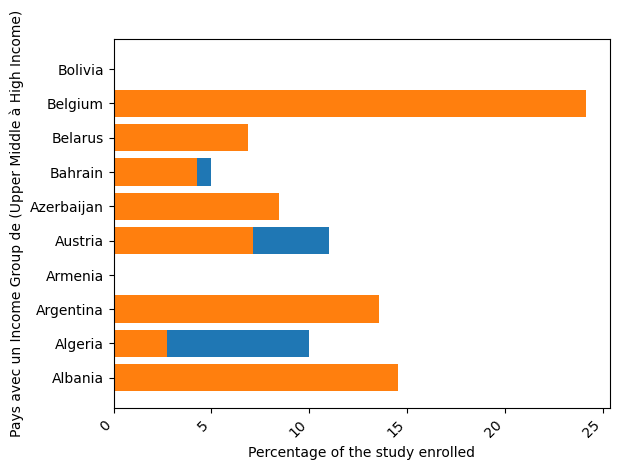

In [179]:
labe = Ed_data['Percentage of students in tertiary education enrolled in Humanities and Arts programmes, both sexes (%)'].values
labe2 = Ed_data['Percentage of students in tertiary education enrolled in Health and Welfare programmes, both sexes (%)'].values

pays = Ed_data.index
pays = pays[:10].astype(str)
label = labe[:10].astype(int)
labe2 = labe2[:10]

print(pays)
len(pays), len(label)
fig, ax = plt.subplots()
ax.barh(pays,label)
ax.barh(pays, labe2)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
#plt.bar( x = x, height = labe, width = 0.5, label = pays)
plt.xlabel("Percentage of the study enrolled")
plt.ylabel("Pays avec un Income Group de (Upper Middle à High Income)")


([<matplotlib.patches.Wedge at 0x1a7f5b8b340>,
 [Text(0.9526279355804298, 0.5500000148652441, 'Albania'),
  Text(0.09587126002379798, 1.0958141728876523, 'Algeria'),
  Text(-0.8426489499534077, 0.7070662961437348, 'Argentina'),
  Text(-1.0832885481844534, 0.19101288273940947, 'Armenia'),
  Text(-1.0490886131329962, -0.3307764831342868, 'Austria'),
  Text(-0.46487999198186136, -0.9969386104745591, 'Azerbaijan'),
  Text(0.1435789305684572, -1.0905893318278967, 'Bahrain'),
  Text(0.5910296898209547, -0.9277305135383584, 'Belarus'),
  Text(1.0162675448809297, -0.42095163287685144, 'Belgium'),
  Text(1.0999999999999892, 1.5448414929211732e-07, 'Bolivia')],
 [Text(0.5196152375893253, 0.30000000810831495, '16.7%'),
  Text(0.05229341455843525, 0.597716821575083, '13.9%'),
  Text(-0.45962669997458594, 0.3856725251693099, '16.7%'),
  Text(-0.5908846626460654, 0.10418884513058697, '0.0%'),
  Text(-0.5722301526179978, -0.18042353625506552, '15.3%'),
  Text(-0.25357090471737886, -0.5437846966224867

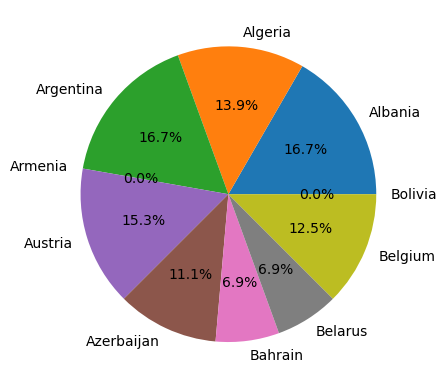

In [181]:
plt.pie( x = label, labels = pays, autopct='%.1f%%')


In [182]:
ed_foot_note = Ed_Stats_Foot_Note
ed_foot_note.head(115)
ed_foot_note.isna().mean()

CountryCode    0.000005
SeriesCode     0.000012
Year           0.000019
DESCRIPTION    0.000019
dtype: float64

In [183]:
edseries = EdSeries

edseries.isna().mean()

edseries.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
coureur = pd.read_csv('C:/Users/Dragomir/Desktop/courseP2.csv',sep=';')
print(coureur.isnull())
coureur.head(4)

     Position   Sexe  Temps   Dept  Temps_secondes    Age
0       False  False  False  False           False  False
1       False  False  False  False           False  False
2       False  False  False  False           False  False
3       False  False  False  False           False  False
4       False  False  False  False           False  False
..        ...    ...    ...    ...             ...    ...
335     False  False  False  False           False  False
336     False  False  False  False           False  False
337     False  False  False  False           False  False
338     False  False  False  False           False  False
339     False  False  False  False           False  False

[340 rows x 6 columns]


,Position,Sexe,Temps,Dept,Temps_secondes,Age
0,1,M,00:32:23,76,779543,40.0
1,2,M,00:32:40,27,779560,34.0
2,3,M,00:33:15,76,779595,44.0
3,4,M,00:33:23,76,779603,46.0


In [186]:
import time
conv = pd.to_datetime(coureur['Temps_secondes'],format = '%H:%M%:%S',errors = 'coerce')
coureur.loc[coureur['Temps_secondes'].duplicated(keep=False),:]

,Position,Sexe,Temps,Dept,Temps_secondes,Age
28,29,M,00:37:07,76,779827,31.0
29,30,M,00:37:07,76,779827,25.0
57,58,M,00:40:41,76,780041,65.0
58,59,M,00:40:41,27,780041,42.0
62,63,M,00:41:13,76,780073,53.0
...,...,...,...,...,...,...
328,329,F,01:06:07,27,781567,20.0
329,330,F,01:06:07,27,781567,28.0
330,331,F,01:06:07,27,781567,29.0
337,338,M,01:09:31,27,781771,24.0
